In [118]:
import matplotlib.pylab as plt
import pylab as pl
import pandas as pd
import numpy as np
import os
from getCitiBikeCSV import getCitiBikeCSV
from scipy import stats
from scipy.stats import norm
from scipy.optimize import curve_fit
from scipy.stats import kstest
%matplotlib inline

In [119]:
datestring = '201501'
getCitiBikeCSV(datestring)

('Downloading', '201501')
file in place, you can continue


In [120]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1


In [121]:
df["age"] = 2015 - df['birth year']
[(df['usertype'] == 'Subscriber')]

[0          True
 1          True
 2          True
 3          True
 4          True
 5          True
 6          True
 7          True
 8          True
 9          True
 10         True
 11         True
 12         True
 13         True
 14         True
 15         True
 16         True
 17         True
 18         True
 19         True
 20         True
 21         True
 22         True
 23         True
 24        False
 25         True
 26        False
 27         True
 28        False
 29         True
           ...  
 285522     True
 285523     True
 285524     True
 285525     True
 285526     True
 285527     True
 285528     True
 285529     True
 285530     True
 285531     True
 285532     True
 285533     True
 285534     True
 285535     True
 285536     True
 285537     True
 285538     True
 285539     True
 285540     True
 285541     True
 285542     True
 285543     True
 285544     True
 285545     True
 285546     True
 285547     True
 285548     True
 285549     Tr

In [122]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,age
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,55.0
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,52.0
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,41.0
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,46.0
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,38.0


In [123]:
df = df.dropna(subset=['birth year'])# drop NAN value
df.drop(['starttime','stoptime','usertype'], axis=1, inplace=1)
df.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,age
count,279924.000000,279924.000000,279924.000000,279924.000000,279924.000000,279924.000000,279924.000000,279924.000000,279924.000000,279924.000000,279924.000000
mean,635.529058,442.295466,40.735816,-73.990181,438.847662,40.735618,-73.990401,18148.242466,1974.951419,1.185858,40.048581
std,848.484027,329.524143,0.018691,0.011647,321.905455,0.018634,0.011706,2065.292950,11.574637,0.389607,11.574637
min,60.000000,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,14529.000000,1899.000000,0.000000,16.000000
25%,332.000000,308.000000,40.723627,-73.998102,307.000000,40.723180,-73.998522,16356.000000,1967.000000,1.000000,31.000000
50%,498.000000,417.000000,40.738274,-73.990093,417.000000,40.738177,-73.990617,18149.000000,1977.000000,1.000000,38.000000
75%,757.000000,492.000000,40.750450,-73.981854,492.000000,40.750200,-73.981918,19904.000000,1984.000000,1.000000,48.000000
max,43023.000000,3002.000000,40.771522,-73.950048,3002.000000,40.771522,-73.950048,21690.000000,1999.000000,2.000000,116.000000


In [124]:
bins = np.arange(10, 99, 1)
age_dis = df.age.groupby(pd.cut(df.age, bins)).agg([np.count_nonzero])
age_norm = age_dis/age_dis.sum()
age_norm.columns=["counts"]

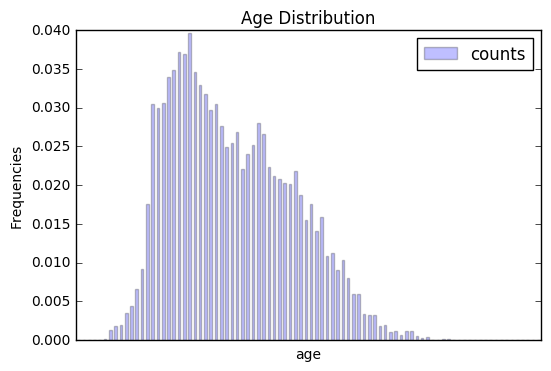

In [125]:
age_norm.plot(kind="bar", alpha=0.25)
pl.xticks([])
pl.title("Age Distribution")
pl.ylabel("Frequencies")

In [126]:
def gaufunc(x, miu, sigma, t):
    a = -(x-miu)**2/(2*sigma**2)
    return t*np.exp(a)

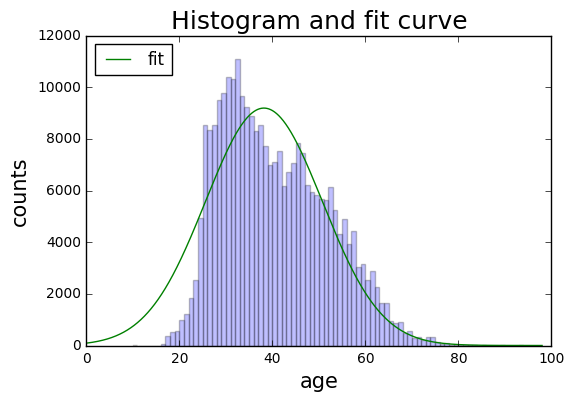

In [127]:
(n,bins,patches) = pl.hist(df.age,bins,alpha = 0.25)
x_lin = np.linspace(bins[0], bins[-1], np.size(n))
x_space = np.linspace(0, bins[-1], 10000)
popt, pcov = curve_fit(gaufunc, x_lin, n, p0 = [30, 1, 10])
y = gaufunc(x_space, *popt)
pl.xlabel('age', fontsize = 15)
pl.ylabel('counts', fontsize = 15)
pl.plot(x_space, y, label= 'fit')
pl.legend(loc = "upper left")
pl.title('Histogram and fit curve',fontsize = 18)

In [128]:
print "The best model mean is: {}".format(popt[0])
print "The best deviation is: {}".format(popt[1])

The best model mean is: 38.1809465928
The best deviation is: 12.5677281746


# 1. KS test
## Null Hypothesis:
H0:Age distribution is drawn from gaussian distribution with the same mean and standard deviation
## Aternative Hypothesis:
H1:Age distribution is not drawn from the gaussian distribution

Significance level alpha=0.05 will be applied

In [129]:
kstest(df.age, "norm", args=(38.18092624,12.56775317))

KstestResult(statistic=0.10070151561752338, pvalue=0.0)

## p-value is extremely small, which indicates that the null hypothesis could be rejected. Therefore, age distribution is not drawn from the gaussian distribution with same mean and standard deviation.


# 2. Anderson Darling test
## Null Hypothesis:
H0:Age distribution is drawn from gaussian distribution with the same mean and standard deviation
## Aternative Hypothesis:
H1:Age distribution is not drawn from the gaussian distribution

Significance level alpha=0.05 will be applied

In [130]:
from scipy.stats import anderson
anderson(df.age, 'norm')

AndersonResult(statistic=2732.9753468561685, critical_values=array([ 0.576,  0.656,  0.787,  0.918,  1.092]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

## As is shown the AD test result is too big for the null hypothesis, thus it could be rejected. Therefore, age distribution is not drawn from the gaussian distribution with same mean and standard deviation.

# Second hypothesis distribution: logistic distribution
# 1. KS test
## Null Hypothesis:
H0:Age distribution is drawn from logistic with certain mean and standard deviation

## Aternative Hypothesis:
Ha:Age distribution is not from logistic distribution

Significance level alpha=0.05 will be applied

In [131]:
def logistic(x, miu, s, a):
    expo = np.exp(-(x-miu)/s)
    temp = (1 + expo)**2
    return a*expo/(s*temp)

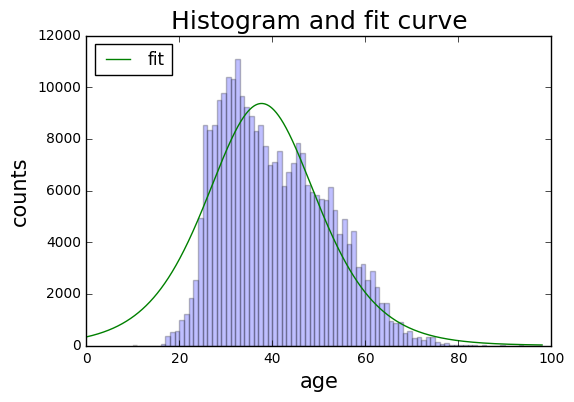

In [132]:
(n,bins,patches) = pl.hist(df.age, bins, alpha = 0.25)
x_lin = np.linspace(bins[0], bins[-1], np.size(n))
x_space = np.linspace(0, bins[-1], 10000)
popt, pcov = curve_fit(logistic, x_lin, n, p0 = [40, 3.6, 10])
y = logistic(x_space, *popt)
pl.xlabel('age', fontsize = 15)
pl.ylabel('counts', fontsize = 15)
pl.plot(x_space, y, label= 'fit')
pl.legend(loc = "upper left")
pl.title('Histogram and fit curve',fontsize = 18)

In [133]:
print "The best model mean is: {}".format(popt[0])
print "The best model deviation is: {}".format(popt[1])

The best model mean is: 37.6788564673
The best model deviation is: 8.00315320399


In [134]:
popt

array([  3.76788565e+01,   8.00315320e+00,   2.99917575e+05])

In [135]:
kstest(df.age, "logistic", args=(popt[0],popt[1]))

KstestResult(statistic=0.12438682512307672, pvalue=0.0)

## p-value is extremely small, which indicates that the null hypothesis could be rejected. Therefore, age distribution is not drawn from the logistic distribution with certain mean and standard deviation.

# 2. AD test
## Null Hypothesis:
H0:Age distribution is drawn from logistic with certain mean and standard deviation

## Aternative Hypothesis:
Ha:Age distribution is not from logistic distribution

Significance level alpha=0.05 will be applied

In [136]:
from scipy.stats import anderson
anderson(df.age, 'logistic')

AndersonResult(statistic=2893.1871237001615, critical_values=array([ 0.426,  0.563,  0.66 ,  0.769,  0.906,  1.01 ]), significance_level=array([ 25. ,  10. ,   5. ,   2.5,   1. ,   0.5]))

## As is shown the AD test result is too big for the null hypothesis, thus it could be rejected. Therefore, age distribution is not drawn from the logistic distribution with certain mean and standard deviation.

# EXTRA CREDIT

Manhatton: North Latitude: 40.882214 South Latitude: 40.680396 East Longitude: -73.907000 West Longitude: -74.047285
Bronx: North Latitude: 40.915255 South Latitude: 40.785743 East Longitude: -73.765274 West Longitude: -73.933406
Lower manhatton: North Latitude: 40.742526 South Latitude: 40.700463 East Longitude: -73.971645 West Longitude: -74.019335
Upper Manhatton: North Latitude: 40.878220 South Latitude: 40.782784 East Longitude: -73.910646 West Longitude: -73.971190
Brooklyn: North Latitude: 40.739446 South Latitude: 40.551042 East Longitude: -73.833365 West Longitude: -74.056630
Queen: North Latitude: 40.800760 South Latitude: 40.542979 East Longitude: -73.700272 West Longitude: -73.962616
Staten island: North Latitude: 40.651812 South Latitude: 40.477399 East Longitude: -74.034547 West Longitude: -74.259090

In [137]:
df.head()

,tripduration,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,birth year,gender,age
0,1346,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,1960.0,2,55.0
1,363,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,1963.0,1,52.0
2,346,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,1974.0,1,41.0
3,182,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,1969.0,1,46.0
4,969,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,1977.0,1,38.0


In [138]:
dfloc = df[["start station latitude", "start station longitude", "age"]]
dfloc.columns=["lati", "longi", 'age']
dfloc.head()

,lati,longi,age
0,40.750020,-73.969053,55.0
1,40.743174,-74.003664,52.0
2,40.740964,-73.986022,41.0
3,40.683178,-73.965964,46.0
4,40.745168,-73.986831,38.0


In [139]:
borrough = {"Bronx":{"nlat":40.915255,"slat":40.785743,"elon":-73.765274,"wlon":-73.933406}, 
            "LowMan":{"nlat":40.742526,"slat":40.700463,"elon":-73.971645,"wlon":-74.019335},
            'UpMan':{"nlat":40.878220,"slat":40.782784,"elon":-73.910646,"wlon":-73.971190},
            "Queens":{"nlat":40.739446,"slat":40.551042,"elon":-73.833365,"wlon": -74.056630},
            "Bruk":{"nlat":40.800760,"slat":40.542979,"elon":-73.700272,"wlon":-73.962616},
            "StaIs":{"nlat":40.651812,"slat":40.477399,"elon":-74.034547,"wlon":-74.259090}}

In [140]:
def mapfunc(loc):
    for keys, location in borrough.iteritems():
        if (loc[0] > location["slat"]) & (loc[0] < location["nlat"]) & (loc[1] >  location["wlon"]) & (loc[1] < location["elon"]):
            return keys
            break
dfloc.loc[0]

lati     40.750020
longi   -73.969053
age      55.000000
Name: 0, dtype: float64

In [141]:
mapfunc(dfloc.loc[5])

In [142]:
dfloc["borrough"] = dfloc.apply(mapfunc, axis=1)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [143]:
dfloc.borrough.fillna("Manhatton", inplace=True)

In [144]:
dfloc.borrough.value_counts()

LowMan       151826
Manhatton    112100
Queens        13272
Bruk           2726
Name: borrough, dtype: int64

In [145]:
dfMan = dfloc[dfloc.borrough=="Manhatton"]
dfLM = dfloc[dfloc.borrough=="LowMan"]
dfQ = dfloc[dfloc.borrough=="Queens"]
dfBk = dfloc[dfloc.borrough=="Bruk"]

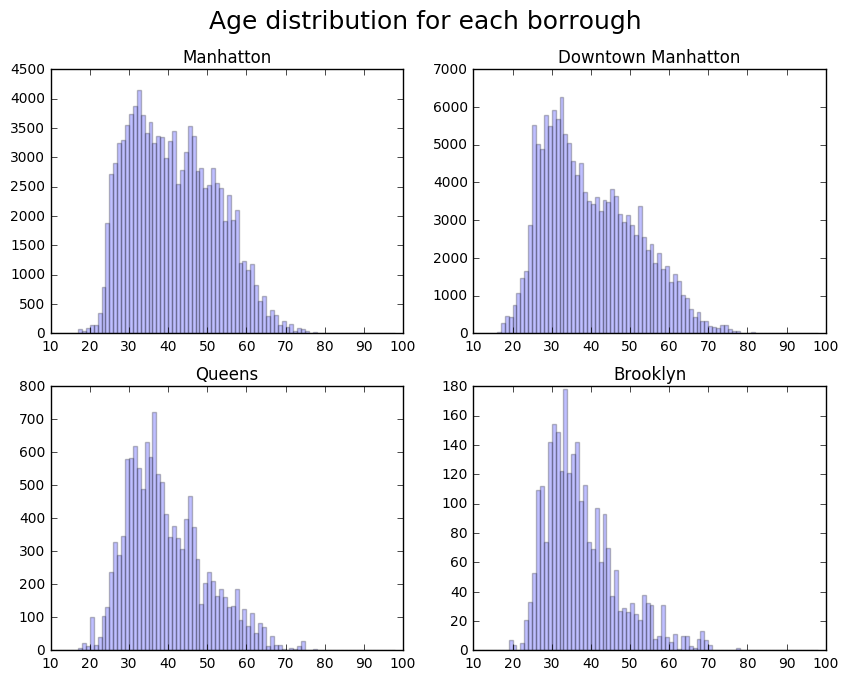

In [146]:
fig = pl.figure(figsize=(10,7.5))
fig.suptitle("Age distribution for each borrough", fontsize=18)
ax = plt.subplot("221")
ax.set_title("Manhatton")
ax.hist(dfMan.age, bins, alpha=0.25)

ax = plt.subplot("222")
ax.set_title("Downtown Manhatton")
ax.hist(dfLM.age, bins, alpha=0.25)

ax = plt.subplot("223")
ax.set_title("Queens")
ax.hist(dfQ.age, bins, alpha=0.25)

ax = plt.subplot("224")
ax.set_title("Brooklyn")
ax.hist(dfBk.age, bins, alpha=0.25)
pl.show()

As is shown in the graph above, the highest frequency of age in all borroughs are located between 30 to 40 years old, one point distinguishs Manhatton is that Manhatton is the only borrough that still have high bike use frequency after 40 years old, more specifically, between 40 to 50 years old.